In [14]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df = pd.read_csv('/Users/wanghansen/Desktop/Data1030 Project 1/World-Stock-Prices-Dataset.csv')
print('data types :')
print()
print(df.dtypes)
print()
print('data dims :',df.shape)

data types :

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
Brand_Name       object
Ticker           object
Industry_Tag     object
Country          object
dtype: object

data dims : (279753, 12)


## **Key Features**

Date: The date of the stock price data.  
Open: The opening price of the stock on that date.  
High: The highest price the stock reached during the trading day.  
Low: The lowest price the stock reached during the trading day.  
Close: The closing price of the stock on that date.  
Volume: The trading volume, i.e., the number of shares traded on that date.  
Dividends: Dividends paid on that date (if any).  
Stock Splits: Information about stock splits (if any).  
Brand_Name: The name of the brand or company.  
Ticker: Ticker symbol for the stock.  
Industry_Tag: The industry category or sector to which the brand belongs.  
Country: The country where the brand is headquartered or primarily operates.  

In [15]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa


In [16]:
df['Date']

0         2023-09-20 00:00:00-04:00
1         2023-09-20 00:00:00-04:00
2         2023-09-20 00:00:00-04:00
3         2023-09-20 00:00:00-04:00
4         2023-09-20 00:00:00-04:00
                    ...            
279748    2023-08-29 00:00:00-04:00
279749    2023-08-30 00:00:00-04:00
279750    2023-08-31 00:00:00-04:00
279751    2023-09-01 00:00:00-04:00
279752    2023-09-05 00:00:00-04:00
Name: Date, Length: 279753, dtype: object

In [17]:
df.isna().sum() #check is there any null value

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

In [18]:
print('number of the company: ' ,df.Ticker.nunique())
print('number of the industry: ',df.Industry_Tag.nunique())

number of the company:  61
number of the industry:  23


In [19]:
df['Close'].describe()


count    279753.000000
mean         65.167955
std         117.190963
min           0.198861
25%          15.050000
50%          32.330002
75%          72.348923
max        2153.199951
Name: Close, dtype: float64

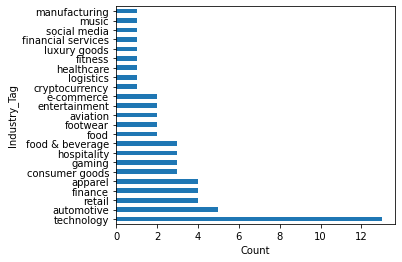

In [20]:

#We can see from the diagram that there is a 61 companies in 23 industries. In the tech industry, there is 13 companies.
plt.figure(figsize=(5,4))
industry_counts_on_date = df[df['Date'] == '2023-09-20 00:00:00-04:00']['Industry_Tag'].value_counts()
len(industry_counts_on_date)
industry_counts_on_date.plot.barh()
plt.xlabel('Count')
plt.ylabel('Industry_Tag')
plt.show()


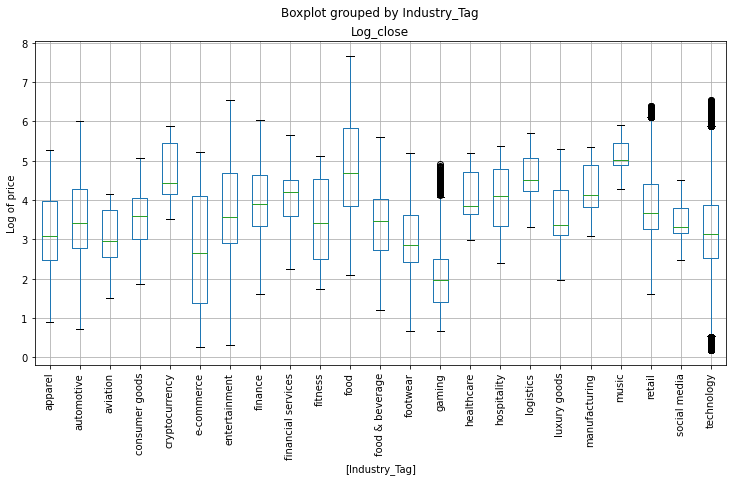

In [98]:
#df[['Volume','Industry_Tag']].boxplot(by='Industry_Tag',figsize=(12,6))
#plt.ylabel('Stock price')
#plt.xticks(rotation=90)
#plt.show()

df['Log_close'] = np.log(df['Close'] + 1)  # 对Volume进行对数变换
df[['Log_close','Industry_Tag']].boxplot(by='Industry_Tag',figsize=(12,6))
plt.ylabel('Log of price')  # 更改ylabel
plt.xticks(rotation=90)
plt.show()



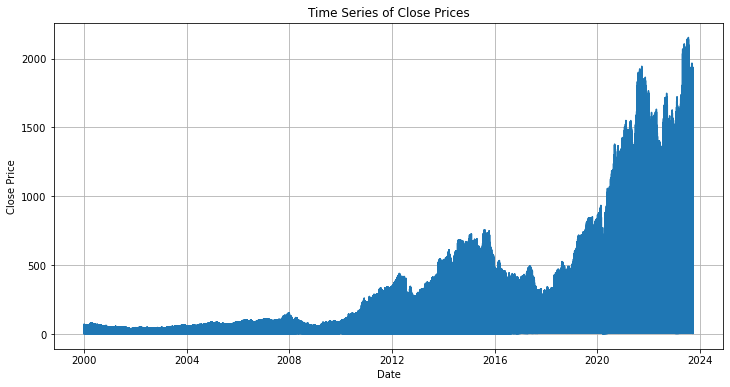

In [21]:
df['Date'] = pd.to_datetime(df['Date'], utc=True) # We want to see the total stocks price included 23 companies from 2000 to now 
df = df.sort_values(by='Date')

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

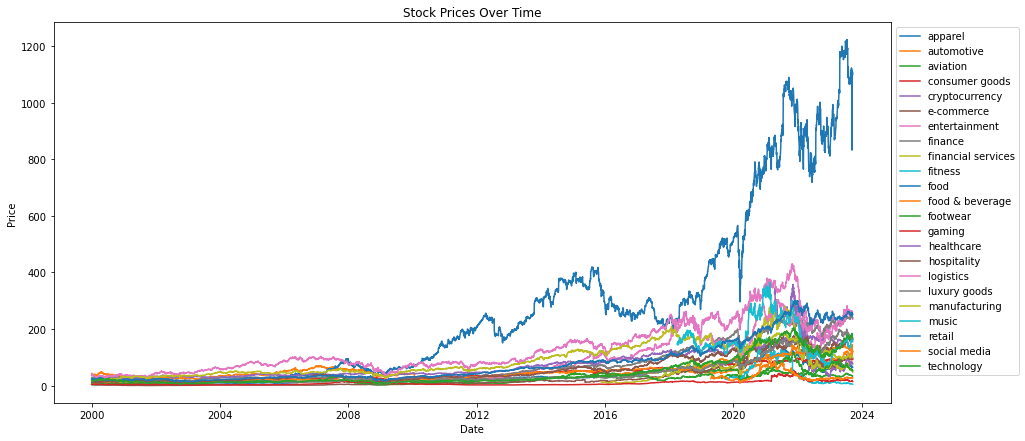

In [24]:
pivot_data = df.pivot_table(index='Date', columns='Industry_Tag', values='Close', aggfunc='mean')

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)  
plt.show()


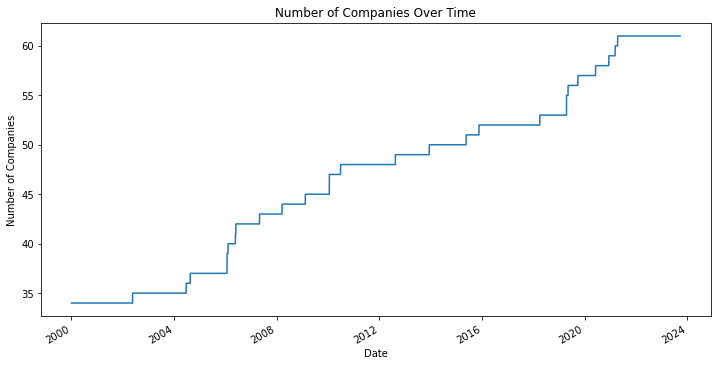

In [25]:

companies_per_date = df.groupby('Date')['Ticker'].nunique()

plt.figure(figsize=(12,6))
companies_per_date.plot()
plt.title('Number of Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Companies')
plt.show()



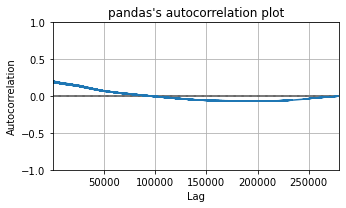

In [26]:
plt.figure(figsize=(5,3))

pd.plotting.autocorrelation_plot(df['Close'])
plt.title("pandas's autocorrelation plot")
plt.tight_layout()
plt.show()


Because the autocorrelation of Close price is move to 0, which means the data itself doesn't have any correlation through the time. Hence, we can directly split the dataset by time's length

In [42]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
df = df.sort_values(by='Date')
df.reset_index(drop=True, inplace=True)
y = df['Close']
X = df.loc[:, df.columns != 'Close']
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

tscv = TimeSeriesSplit(n_splits=5)
train_indices, val_indices = list(tscv.split(X_train_test))[-1]

X_train, X_val = X_train_test.iloc[train_indices], X_train_test.iloc[val_indices]
y_train, y_val = y_train_test.iloc[train_indices], y_train_test.iloc[val_indices]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(186502, 11)
(37300, 11)
(55951, 11)


In [52]:
#Autoregression

# For the training set
X_train_lagged = pd.concat([y_train.shift(3), y_train.shift(2), y_train.shift(1)], axis=1)
X_train_lagged.columns = ['lag 3 days', 'lag 2 days', 'lag 1 day']
X_train = pd.concat([X_train, X_train_lagged], axis=1)
#print(X_train_lagged.head(10))
#print(y_train.head(10))

# For the validation set
X_val_lagged = pd.concat([y_val.shift(3), y_val.shift(2), y_val.shift(1)], axis=1)
X_val_lagged.columns = ['lag 3 days', 'lag 2 days', 'lag 1 day']
X_val = pd.concat([X_val, X_val_lagged], axis=1)
#print(X_val_lagged.tail(10))
#print(y.tail(10))

# For the test set
X_test_lagged = pd.concat([y_test.shift(3), y_test.shift(2), y_test.shift(1)], axis=1)
X_test_lagged.columns = ['lag 3 days', 'lag 2 days', 'lag 1 day']
X_test = pd.concat([X_test, X_test_lagged], axis=1)
#print(X_test_lagged.tail(10))
#print(y.tail(10))



In [99]:
X_train.head()


,Date,Open,High,Low,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,lag 3 days,lag 2 days,lag 1 day
0,2000-01-03 05:00:00+00:00,9.653981,9.765803,9.355788,3277800.0,0.0,0.0,southwest airlines,LUV,aviation,usa,NaN,NaN,NaN
1,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,6471267.0,0.0,0.0,american express,AXP,finance,usa,NaN,NaN,9.467610
2,2000-01-03 05:00:00+00:00,24.863424,25.071313,23.990294,12019200.0,0.0,0.0,jpmorgan chase & co,JPM,finance,usa,NaN,9.467610,33.198849
3,2000-01-03 05:00:00+00:00,42.196946,42.542823,39.237780,12030800.0,0.0,0.0,the home depot,HD,retail,usa,9.467610,33.198849,24.239759
4,2000-01-03 05:00:00+00:00,0.903091,0.910259,0.843363,30091200.0,0.0,0.0,nvidia,NVDA,technology,usa,33.198849,24.239759,40.083256


In [74]:
X_train.isna().sum() 

Date            0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
lag 3 days      3
lag 2 days      2
lag 1 day       1
dtype: int64

In [76]:
X_val.isna().sum()

Date            0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
lag 3 days      3
lag 2 days      2
lag 1 day       1
dtype: int64

In [77]:
X_test.isna().sum()

Date            0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
lag 3 days      3
lag 2 days      2
lag 1 day       1
dtype: int64

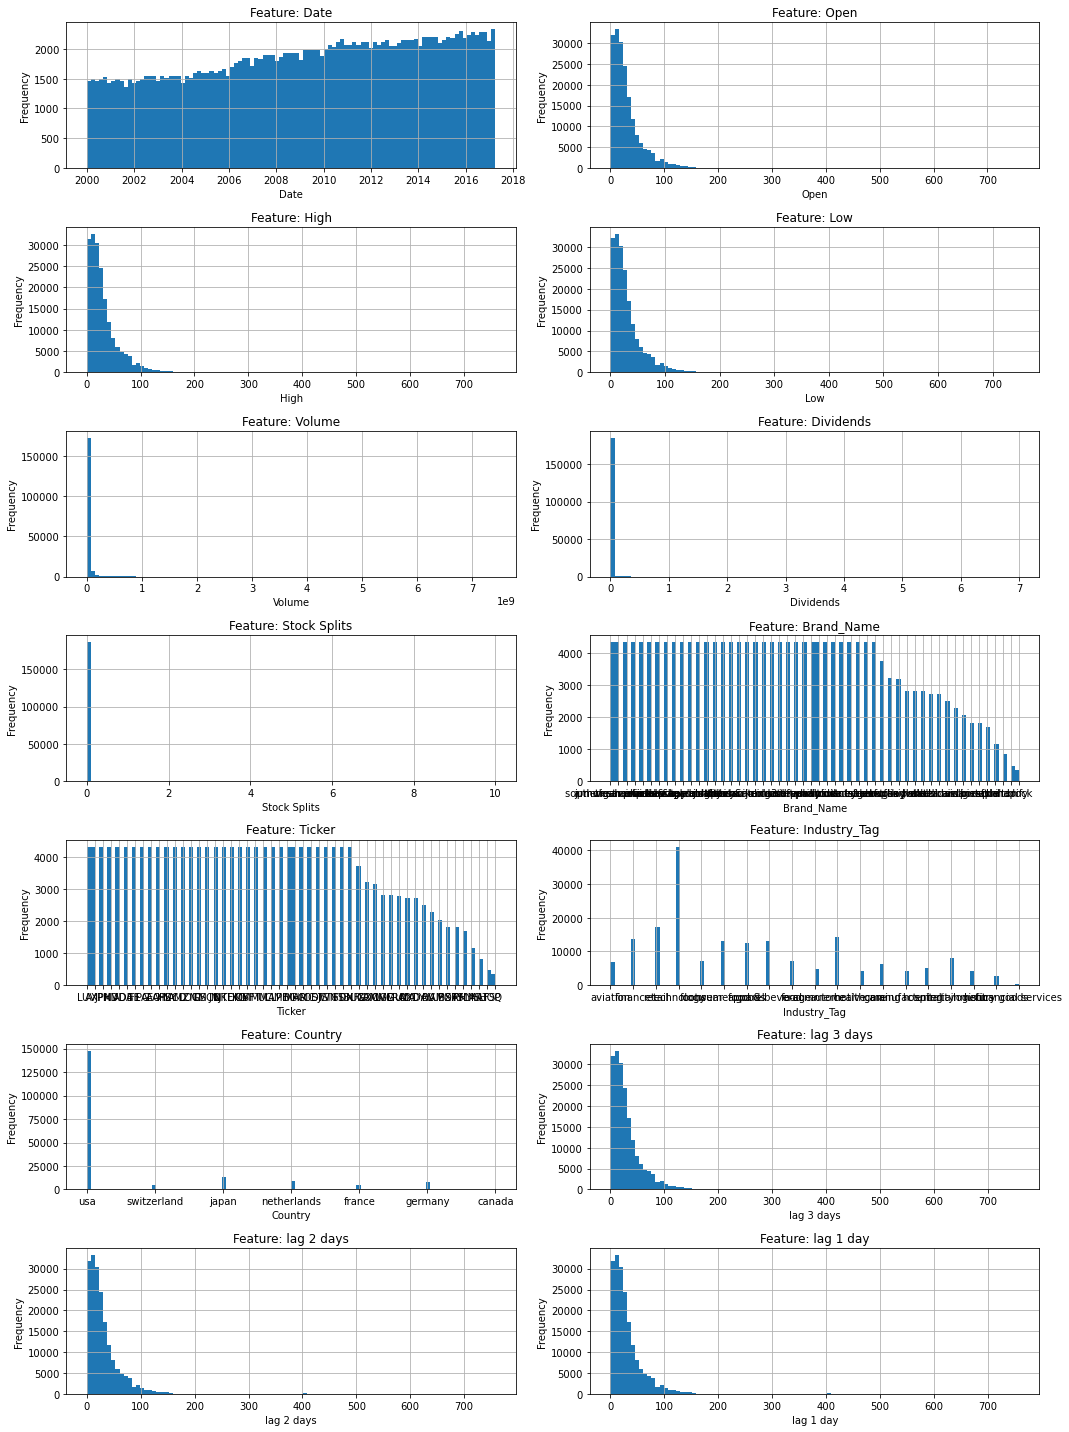

In [100]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))  # 7行2列的子图布局
axes = axes.ravel()  # 将2D的子图数组转换为1D，以便我们可以轻松地迭代它

for i, col in enumerate(X_train.columns):
    X_train[col].hist(bins=100, ax=axes[i])
    axes[i].set_title(f"Feature: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()  # 调整子图之间的间距
plt.show()


Plotting for feature Date


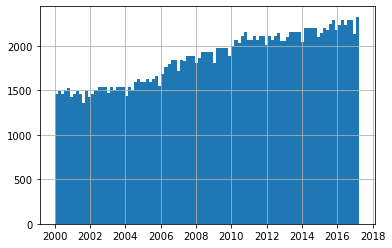

Plotting for feature Open


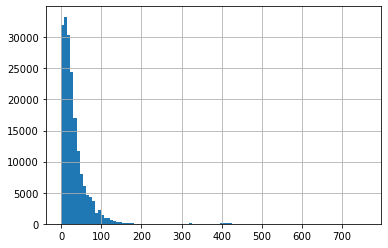

Plotting for feature High


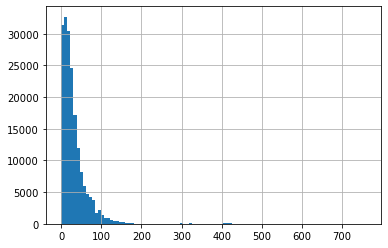

Plotting for feature Low


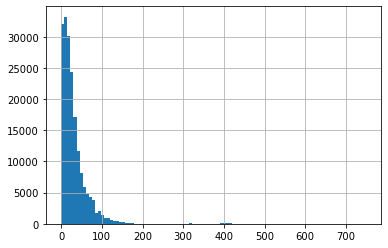

Plotting for feature Volume


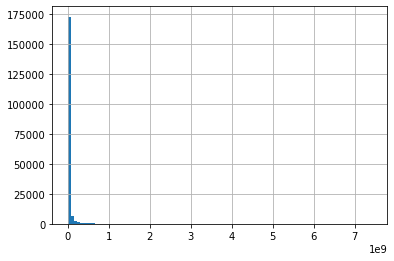

Plotting for feature Dividends


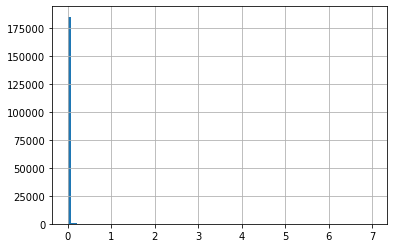

Plotting for feature Stock Splits


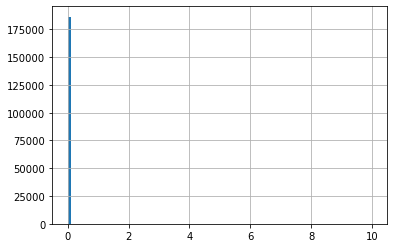

Plotting for feature Brand_Name


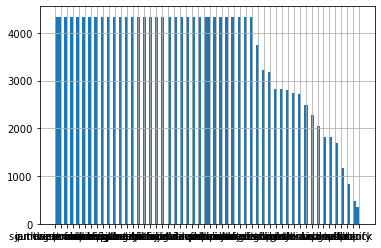

Plotting for feature Ticker


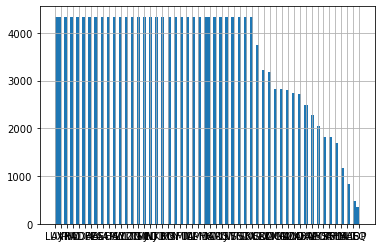

Plotting for feature Industry_Tag


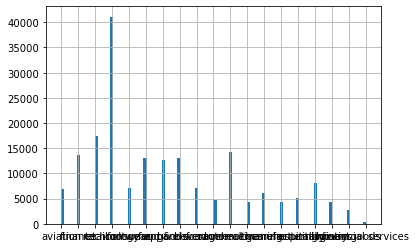

Plotting for feature Country


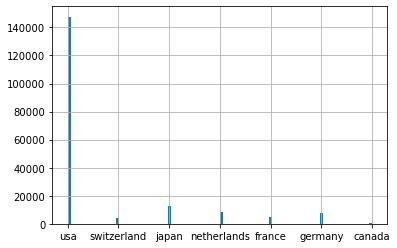

Plotting for feature lag 3 days


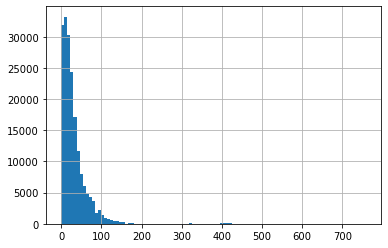

Plotting for feature lag 2 days


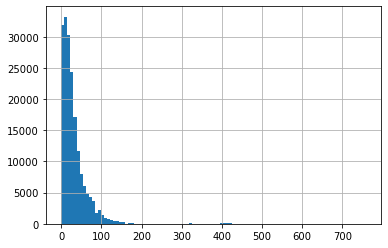

Plotting for feature lag 1 day


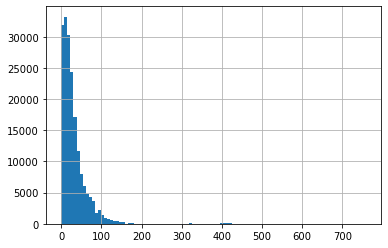

In [82]:
for col in X_train.columns:
    hist = X_train[col].hist(bins=100)
    print("Plotting for feature {}".format(col))
    plt.show()

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

onehot_ftrs = ['Brand_Name','Ticker','Industry_Tag','Country']
minmax_ftrs = ['Volume','Dividends','Stock Splits']
std_ftrs = ['Open','High','Low','lag 3 days','lag 2 days','lag 1 day']
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess                                                     # later on we will add other steps here
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)


(186502, 14)
(186502, 139)
[[ 0.          0.          0.         ...         nan         nan
          nan]
 [ 0.          0.          0.         ...         nan         nan
  -0.48828729]
 [ 0.          0.          0.         ...         nan -0.48828635
  -0.00098723]
 ...
 [ 0.          0.          0.         ...  0.19087143 -0.13956115
   0.60501444]
 [ 0.          0.          0.         ... -0.1395632   0.60501246
  -0.43908267]
 [ 0.          0.          0.         ...  0.6050088  -0.43908185
  -0.0670195 ]]
